In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
files_simu = [
    './simulation/2011_MagDown.root', 
    './simulation/2015_MagDown.root',
    './simulation/2015_MagUp.root',
    './simulation/2016_MagDown.root',
    './simulation/2016_MagUp.root',
    './simulation/2017_MagDown.root',
    './simulation/2017_MagUp.root',
    './simulation/2018_MagDown.root',
    './simulation/2018_MagUp.root'
]

files_real_data = [
    './real_data/2011_MagDown.root', 
    './real_data/2011_MagUp.root', 
    './real_data/2015_MagDown.root',
    './real_data/2015_MagUp.root',
    './real_data/2016_MagDown.root',
    './real_data/2016_MagUp.root',
    './real_data/2017_MagDown.root',
    './real_data/2017_MagUp.root',
    './real_data/2018_MagDown.root',
    './real_data/2018_MagUp.root'
]
simu_data = uproot.concatenate(files_simu, cut = 'Bc_BKGCAT==0', library='pd')
real_data = uproot.concatenate(files_real_data, library='pd')
real_data['delta_mass'] = real_data['Dst_M'] - real_data['D0_M']
simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']

/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_2714/2707302748.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_data['delta_mass'] = real_data['Dst_M'] - real_data['D0_M']
/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_2714/2707302748.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']


In [3]:
#SELECTIONS

Notion_model_selection_D0 = ('(D0_ENDVERTEX_CHI2 < 9.) &'
    '(delta_mass>139) & (delta_mass<151) & '
    '(D0_M>1830) & (D0_M<1890) & '
    '(K_IPCHI2_OWNPV>3.) & (pi_IPCHI2_OWNPV>3.) &' 
    '(K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7) & '
    '(K_PT>250) & (pi_PT>250) &' 
    '(K_hasRich==1) & (pi_hasRich==1) & '
    '(K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & '
    '(K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
)

Notion_model_selection_Jpsi = (
    '(delta_mass>139) & (delta_mass<151) &'
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) &'

    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) &'
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'

)
Notion_model_selection_Dst = (

    '(delta_mass > 140) & (delta_mass < 150) & '
    '(Dst_ENDVERTEX_CHI2 < 9.) &'
    'abs(Dst_M - 2010.) < 40. &'
    'Dst_PT > 2700. &'
    'pi_soft_PT > 250. &'
    'pi_soft_TRACK_CHI2NDOF < 2. &'
    'pi_soft_TRACK_GhostProb < 0.4 &'
#already applied:
    'Bc_ENDVERTEX_CHI2 < 4.2 &'
    'Bc_IPCHI2_OWNPV < 10. &'
    'Bc_DIRA_OWNPV > 0.99'
)

THE_BIG_SELECTION = (
    '(D0_ENDVERTEX_CHI2 < 9.) &'
    '(delta_mass > 139) & (delta_mass < 151) & '
    '(D0_M > 1830) & (D0_M < 1890) & '
    '(K_IPCHI2_OWNPV > 3.) & (pi_IPCHI2_OWNPV > 3.) & '
    '(K_TRACK_CHI2NDOF < 1.7) & (pi_TRACK_CHI2NDOF < 1.7) & '
    '(K_PT > 250) & (pi_PT > 250) & '
    '(K_hasRich == 1) & (pi_hasRich == 1) & '
    '(K_ProbNNghost < 0.3) & (pi_ProbNNghost < 0.3) & '
    '(K_ProbNNk > 0.1) & (pi_ProbNNpi > 0.1) & '
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) & '
    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) & '
    '(Jpsi_ENDVERTEX_CHI2 < 5.) &'
    '(Dst_ENDVERTEX_CHI2 < 9.) &'
    'abs(Dst_M - 2010.) < 40. &'
    'Dst_PT > 2700. &'
    'pi_soft_PT > 250. &'
    'pi_soft_TRACK_CHI2NDOF < 2. &'
    'pi_soft_TRACK_GhostProb < 0.4 &'
    'Bc_ENDVERTEX_CHI2 < 4.2 &'
    'Bc_IPCHI2_OWNPV < 10. &'
    'Bc_DIRA_OWNPV > 0.99'
)

Mean of SIMULATION: 6277.37 MeV
Mean of REAL DATA: 6529.46 MeV
Mean of SIMULATION with NOTION MODEL cutting: 6277.55 MeV
Mean of REAL DATA with NOTION MODEL cutting: 6611.37 MeV


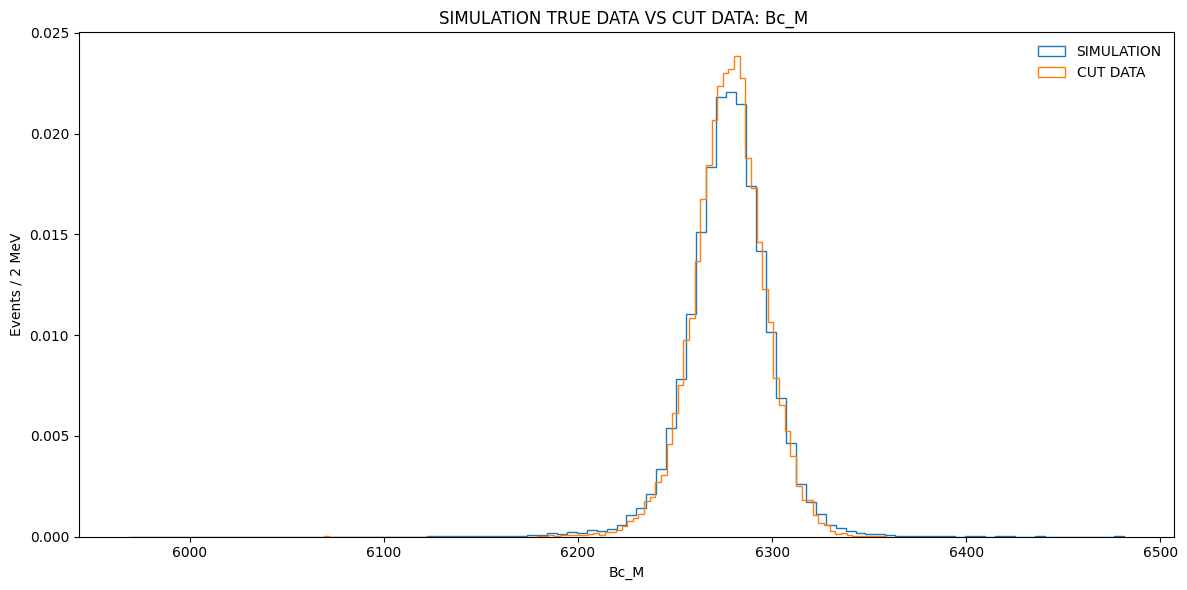

In [4]:
#Bc MASS CHECKING

simu_data_true = simu_data['Bc_M']
real_data_true = real_data['Bc_M']
simu_data_cut = simu_data.query(THE_BIG_SELECTION)['Bc_M']
real_data_cut = real_data.query(THE_BIG_SELECTION)['Bc_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data['Bc_M'],density = True, bins=100, histtype='step', label='SIMULATION')
axes.hist(simu_data.query(THE_BIG_SELECTION)['Bc_M'],density = True, bins=100, histtype='step', label='CUT DATA')
axes.set_xlabel('Bc_M')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION TRUE DATA VS CUT DATA: Bc_M ')
axes.legend(frameon=False)


plt.tight_layout()
plt.show()

In [5]:
#EFFICIENCY FOR Jpsi:

# Calculate the number of events before and after cutting for the simulation and real data
simu_before_cut = len(simu_data['Jpsi_M'])
simu_after_cut = len(simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M'])
real_before_cut = len(real_data['Jpsi_M'])
real_after_cut = len(real_data.query(Notion_model_selection_Jpsi)['Jpsi_M'])

# Efficiency calculations
simu_efficiency = simu_after_cut / simu_before_cut if simu_before_cut else 0
real_efficiency = real_after_cut / real_before_cut if real_before_cut else 0

print(f"SIMULATION Efficiency for Jpsi: {simu_efficiency*100:.2f}%")
print(f"REAL DATA Efficiency for Jpsi: {real_efficiency*100:.2f}%")


SIMULATION Efficiency for Jpsi: 77.52%
REAL DATA Efficiency for Jpsi: 9.53%


In [8]:
#EFFICIENCY FOR D0:

# Calculate the number of events before and after cutting for the simulation and real data
simu_before_cut = len(simu_data['D0_M'])
simu_after_cut = len(simu_data.query(Notion_model_selection_D0)['D0_M'])
real_before_cut = len(real_data['D0_M'])
real_after_cut = len(real_data.query(Notion_model_selection_D0)['D0_M'])

# Efficiency calculations
simu_efficiency = simu_after_cut / simu_before_cut if simu_before_cut else 0
real_efficiency = real_after_cut / real_before_cut if real_before_cut else 0

print(f"SIMULATION Efficiency for D0: {simu_efficiency*100:.2f}%")
print(f"REAL DATA Efficiency for D0: {real_efficiency*100:.2f}%")


SIMULATION Efficiency for D0: 80.92%
REAL DATA Efficiency for D0: 0.23%


In [9]:
#EFFICIENCY FOR Dst:

# Calculate the number of events before and after cutting for the simulation and real data
simu_before_cut = len(simu_data['Dst_M'])
simu_after_cut = len(simu_data.query(Notion_model_selection_Dst)['Dst_M'])
real_before_cut = len(real_data['Dst_M'])
real_after_cut = len(real_data.query(Notion_model_selection_Dst)['Dst_M'])

# Efficiency calculations
simu_efficiency = simu_after_cut / simu_before_cut if simu_before_cut else 0
real_efficiency = real_after_cut / real_before_cut if real_before_cut else 0

print(f"SIMULATION Efficiency for Dst: {simu_efficiency*100:.2f}%")
print(f"REAL DATA Efficiency for Dst: {real_efficiency*100:.2f}%")


SIMULATION Efficiency for Dst: 92.34%
REAL DATA Efficiency for Dst: 0.19%


In [11]:
#OVERALL PERFORMANCE
# Calculate the number of events before and after cutting for the simulation and real data
simu_before_cut = len(simu_data)
simu_after_cut = len(simu_data.query(THE_BIG_SELECTION))
real_before_cut = len(real_data)
real_after_cut = len(real_data.query(THE_BIG_SELECTION))

# Efficiency calculations
simu_efficiency = simu_after_cut / simu_before_cut if simu_before_cut else 0
real_efficiency = real_after_cut / real_before_cut if real_before_cut else 0

print(f"SIMULATION Efficiency with both cuts: {simu_efficiency*100:.2f}%")
print(f"REAL DATA Efficiency with both cuts: {real_efficiency*100:.2f}%")
print(f"number of events in simu: {len(simu_data.query(THE_BIG_SELECTION))}")
print(f"number of events in real: {len(real_data.query(THE_BIG_SELECTION))}")
print(f"number of events in real: {len(real_data)}")

SIMULATION Efficiency with both cuts: 59.74%
REAL DATA Efficiency with both cuts: 0.98%
number of events in simu: 25728
number of events in real: 1603
number of events in real: 164022


Mean of SIMULATION: 3097.67 MeV
Mean of REAL DATA: 3094.31 MeV
Mean of SIMULATION with NOTION MODEL cutting: 3097.67 MeV
Mean of REAL DATA with NOTION MODEL cutting: 3094.10 MeV
SIMULATION efficiency: 59.74% (25728/43069)
REAL DATA efficiency: 0.98% (1603/164022)


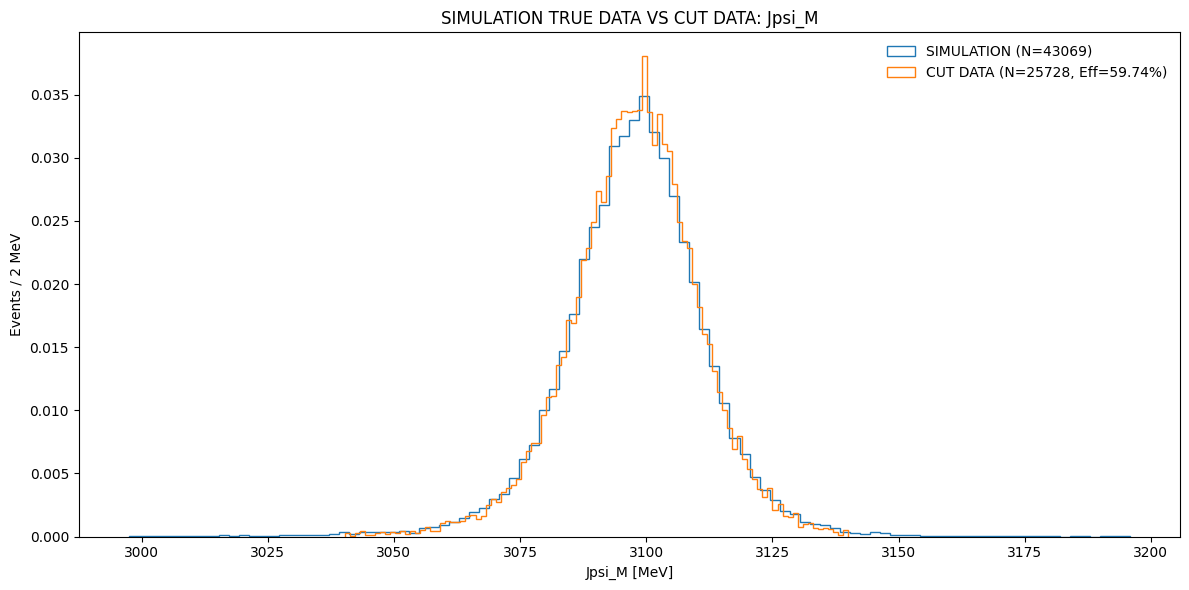

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Jpsi MASS CHECKING
simu_data_true = simu_data['Jpsi_M']
real_data_true = real_data['Jpsi_M']
simu_data_cut = simu_data.query(THE_BIG_SELECTION)['Jpsi_M']
real_data_cut = real_data.query(THE_BIG_SELECTION)['Jpsi_M']

# Mean calculations
mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

# Event counts
simu_before_cut = len(simu_data)
simu_after_cut = len(simu_data_cut)
real_before_cut = len(real_data)
real_after_cut = len(real_data_cut)

# Efficiency calculations
simu_efficiency = simu_after_cut / simu_before_cut if simu_before_cut else 0
real_efficiency = real_after_cut / real_before_cut if real_before_cut else 0

# Print statistics
print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')
print(f'SIMULATION efficiency: {simu_efficiency:.2%} ({simu_after_cut}/{simu_before_cut})')
print(f'REAL DATA efficiency: {real_efficiency:.2%} ({real_after_cut}/{real_before_cut})')

# Plot histograms
fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data_true, density=True, bins=100, histtype='step', label=f'SIMULATION (N={simu_before_cut})')
axes.hist(simu_data_cut, density=True, bins=100, histtype='step', 
          label=f'CUT DATA (N={simu_after_cut}, Eff={simu_efficiency:.2%})')

# Labels and title
axes.set_xlabel('Jpsi_M [MeV]')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION TRUE DATA VS CUT DATA: Jpsi_M')
axes.legend(frameon=False, loc='upper right')

plt.tight_layout()
plt.show()


Mean of SIMULATION: 2010.78 MeV
Mean of REAL DATA: 2012.92 MeV
Mean of SIMULATION with THE_BIG_SELECTION cutting: 2010.91 MeV
Mean of REAL DATA with THE_BIG_SELECTION cutting: 2009.62 MeV


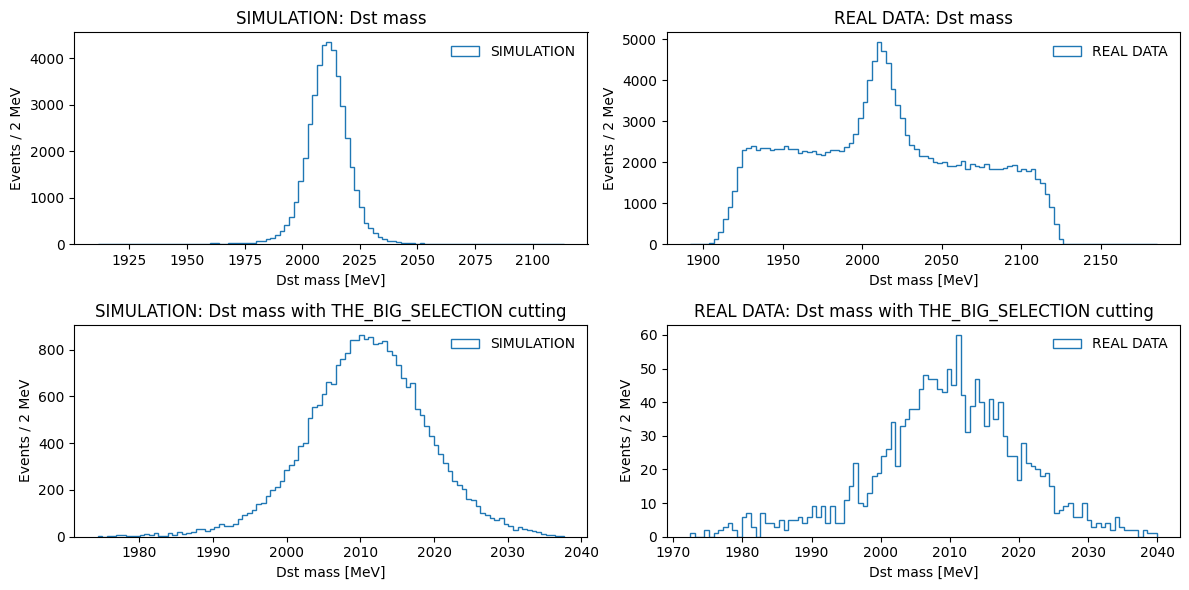

In [15]:
simu_data_true = simu_data['Dst_M']
real_data_true = real_data['Dst_M']
simu_data_cut = simu_data.query(THE_BIG_SELECTION)['Dst_M']
real_data_cut = real_data.query(THE_BIG_SELECTION)['Dst_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with THE_BIG_SELECTION cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with THE_BIG_SELECTION cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Dst mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Dst mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Dst mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Dst mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(THE_BIG_SELECTION)['Dst_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Dst mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Dst mass with THE_BIG_SELECTION cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(THE_BIG_SELECTION)['Dst_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Dst mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Dst mass with THE_BIG_SELECTION cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()